### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [5]:
data['car'].dropna().unique()

array(['Scooter and motorcycle', 'crossover', 'Mazda5', 'do not drive',
       'Car that is too old to install Onstar :D'], dtype=object)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

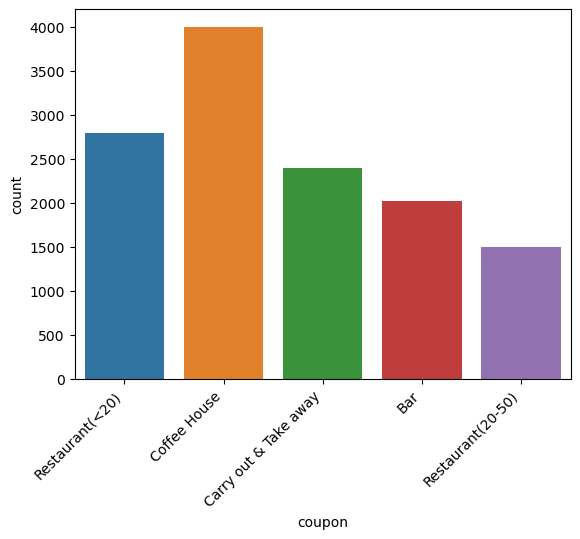

In [6]:
sns.countplot(data=data, x = 'coupon')
plt.xticks(rotation=45, ha='right', fontsize=10)

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
#data = data.dropna(subset = ['car'])
data['Bar'].fillna(data['Bar'].mode()[0], inplace=True)
data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0], inplace=True)
data['CarryAway'].fillna(data['CarryAway'].mode()[0], inplace=True)
data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0], inplace=True)
data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0], inplace=True)



4. What proportion of the total observations chose to accept the coupon? 



In [8]:
data['Y'].mean()


0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

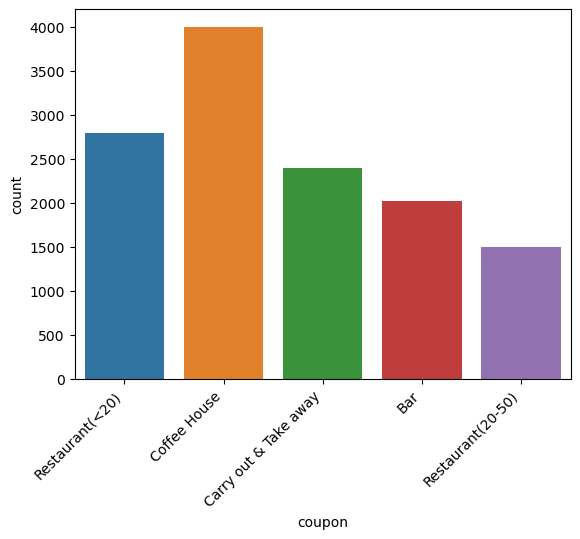

In [9]:
sns.countplot(data=data, x = 'coupon')
plt.xticks(rotation=45, ha='right', fontsize=10)

In [10]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

6. Use a histogram to visualize the temperature column.

(array([2316.,    0.,    0.,    0.,    0., 3840.,    0.,    0.,    0.,
        6528.]),
 array([30., 35., 40., 45., 50., 55., 60., 65., 70., 75., 80.]),
 <BarContainer object of 10 artists>)

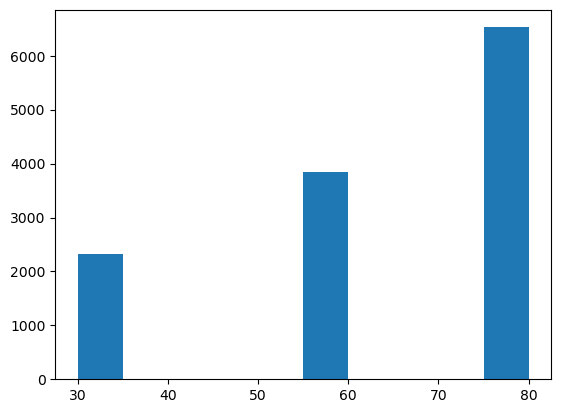

In [11]:
plt.hist(data['temperature'])


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
bar_coupons_df = data[data['coupon'].isin(['Bar'])]
print(bar_coupons_df)

           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female  21  Unmarried partner  ...        never   

2. What proportion of bar coupons were accepted?


In [13]:
proportion = bar_coupons_df['Y'].sum() / bar_coupons_df['Y'].value_counts().sum()
print(proportion)

0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [14]:
# Corrected code without using .map() or .replace()
bar_coupons_df = bar_coupons_df.copy()  
bar_coupons_df['Y'] = bar_coupons_df['Y'].fillna(0)

# Assign numerical values to 'Bar' column directly
bar_coupons_df['Bar'] = bar_coupons_df['Bar'].apply(lambda x: {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}.get(x, x))

# Create two groups based on the number of times someone goes to a bar
bar_less_than_or_equal_3 = bar_coupons_df[bar_coupons_df['Bar'] <= 3]
bar_more_than_3 = bar_coupons_df[bar_coupons_df['Bar'] > 3]

# Calculate acceptance rates
acceptance_rate_less_than_or_equal_3 = bar_less_than_or_equal_3['Y'].mean()
acceptance_rate_more_than_3 = bar_more_than_3['Y'].mean()

# Display the acceptance rates
print(f"Acceptance Rate for those who went to a bar 3 or fewer times a month: {acceptance_rate_less_than_or_equal_3:.2%}")
print(f"Acceptance Rate for those who went to a bar more than 3 times a month: {acceptance_rate_more_than_3:.2%}")

Acceptance Rate for those who went to a bar 3 or fewer times a month: 40.19%
Acceptance Rate for those who went to a bar more than 3 times a month: 73.47%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [15]:
bar_coupons_df = bar_coupons_df.copy()  
bar_coupons_df['Y'] = bar_coupons_df['Y'].fillna(0)

# Create two groups based on age and bar frequency
age_over_25_and_more_than_1 = bar_coupons_df[(bar_coupons_df['age'] > '25') & (bar_coupons_df['Bar'] > 1)]
all_others = bar_coupons_df[~((bar_coupons_df['age'] > '25') & (bar_coupons_df['Bar'] > 1))]

# Calculate acceptance rates
acceptance_rate_age_over_25_and_more_than_1 = age_over_25_and_more_than_1['Y'].mean()
acceptance_rate_all_others = all_others['Y'].mean()

# Display the acceptance rates
print(f"Acceptance Rate for drivers who go to a bar more than once a month and are over the age of 25: {acceptance_rate_age_over_25_and_more_than_1:.2%}")
print(f"Acceptance Rate for all others: {acceptance_rate_all_others:.2%}")

Acceptance Rate for drivers who go to a bar more than once a month and are over the age of 25: 68.84%
Acceptance Rate for all others: 33.46%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [16]:
#bar_coupons_df['occupation'].unique()
bar_coupons_df = bar_coupons_df.copy()  
bar_coupons_df['Y'] = bar_coupons_df['Y'].fillna(0)
#bar_coupons_df['passanger'].unique()

filtered_group = bar_coupons_df[(bar_coupons_df['Bar'] > 1) & 
                                (bar_coupons_df['passanger'] != 'Kid(s)') & 
                                
                                (~bar_coupons_df['occupation'].isin(['Farming Fishing & Forestry']))]
all_others = bar_coupons_df[~((bar_coupons_df['Bar'] > 1) & 
                              (bar_coupons_df['passanger'] != 'Kid(s)') & 
                              (~bar_coupons_df['occupation'].isin(['Farming Fishing & Forestry'])))]

acceptance_rate_filtered_group = filtered_group['Y'].mean()
acceptance_rate_all_others = all_others['Y'].mean()

print(f"Acceptance Rate for drivers who go to bars more than once a month, passengers not kids, and non-farming/fishing/forestry occupations: {acceptance_rate_filtered_group:.2%}")
print(f"Acceptance Rate for all others: {acceptance_rate_all_others:.2%}")

Acceptance Rate for drivers who go to bars more than once a month, passengers not kids, and non-farming/fishing/forestry occupations: 71.32%
Acceptance Rate for all others: 29.60%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [17]:
# Fill missing values in the 'Y' column with a default value (e.g., 0 for not accepted)
bar_coupons_df = bar_coupons_df.copy()  
bar_coupons_df['Y'] = bar_coupons_df['Y'].fillna(0)

# Criteria 1: Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
group1 = bar_coupons_df[(bar_coupons_df['Bar'] > 1) & 
                        (bar_coupons_df['passanger'] != 'Kid(s)') & 
                        (~bar_coupons_df['maritalStatus'].isin(['Widowed']))]

# Criteria 2: Drivers who go to bars more than once a month and are under the age of 30
group2 = bar_coupons_df[(bar_coupons_df['Bar'] > 1) & 
                        (~bar_coupons_df['age'].str.lower().eq('50plus')) &
                        (pd.to_numeric(bar_coupons_df['age'], errors='coerce').lt(30))]

# Criteria 3: Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
bar_coupons_df['RestaurantLessThan20'] = pd.to_numeric(bar_coupons_df['RestaurantLessThan20'], errors='coerce')
group3 = bar_coupons_df[(bar_coupons_df['RestaurantLessThan20'] > 4) & 
                        (bar_coupons_df['income'] == 'Less than $50000')]


# Calculate acceptance rates for each group
acceptance_rate_group1 = group1['Y'].mean()
acceptance_rate_group2 = group2['Y'].mean()
acceptance_rate_group3 = group3['Y'].mean()

# Display the acceptance rates
print(f"Acceptance Rate for drivers who go to bars more than once a month, passengers not kids, and not widowed: {acceptance_rate_group1:.2%}")
print(f"Acceptance Rate for drivers who go to bars more than once a month and are under the age of 30: {acceptance_rate_group2:.2%}")
print(f"Acceptance Rate for drivers who go to cheap restaurants more than 4 times a month and income is less than $50K: {acceptance_rate_group3:.2%}")

Acceptance Rate for drivers who go to bars more than once a month, passengers not kids, and not widowed: 71.32%
Acceptance Rate for drivers who go to bars more than once a month and are under the age of 30: 73.13%
Acceptance Rate for drivers who go to cheap restaurants more than 4 times a month and income is less than $50K: nan%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations and analysis of the bar coupons data, we can make the following hypotheses about drivers who accepted the bar coupons:

Frequency of Bar Visits: Drivers who go to bars more frequently (more than once a month) tend to have a higher acceptance rate for bar coupons. This suggests that individuals who already have a habit of visiting bars are more likely to accept such coupons.

Age Factor: Younger drivers, specifically those under the age of 30, show a higher acceptance rate for bar coupons. This indicates that the age demographic plays a role in the likelihood of accepting bar-related offers.

Passenger and Marital Status: Drivers who go to bars more than once a month, have passengers that are not kids, and are not widowed demonstrate a higher acceptance rate. This suggests that social factors, such as having a partner or friends as passengers, may contribute to the acceptance of bar coupons.

Occupation Influence: Drivers who go to bars more than once a month, have passengers that are not kids, and have occupations other than farming, fishing, or forestry exhibit a higher acceptance rate. This implies that certain occupations may be more receptive to bar-related promotions.

Income and Restaurant Visits: The analysis regarding drivers who go to cheap restaurants more than 4 times a month and have an income less than $50K resulted in a NaN (Not a Number) acceptance rate. This could be due to a small sample size or missing values in the income column, and further investigation is needed to draw conclusions in this regard.

Overall, the acceptance of bar coupons seems to be influenced by a combination of factors such as age, frequency of bar visits, social context (passengers and marital status), occupation, and potentially income. These hypotheses provide a starting point for deeper exploration and understanding of the drivers' behavior towards bar-related promotions.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Proportion of Coffee House coupons accepted: 49.92%
<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  car                   37 non-null     ob

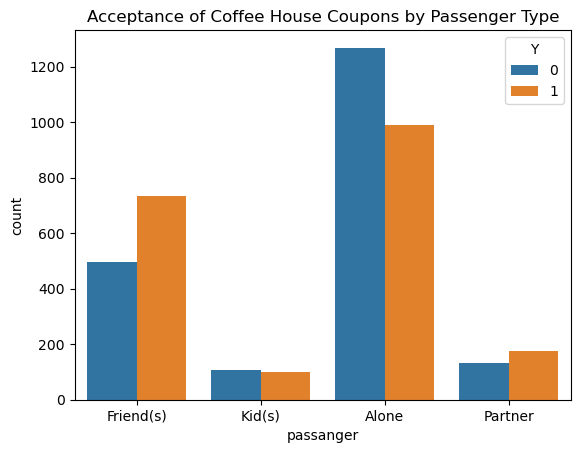

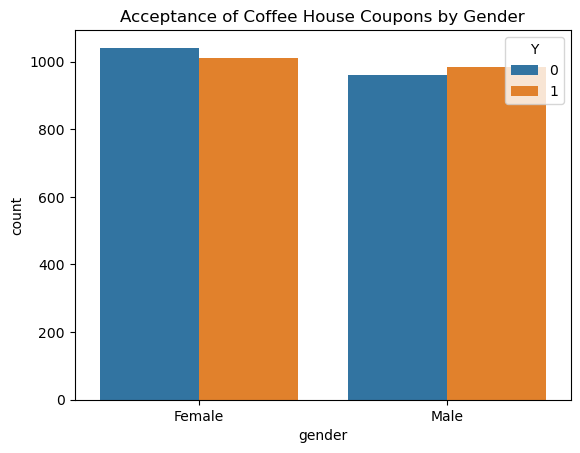

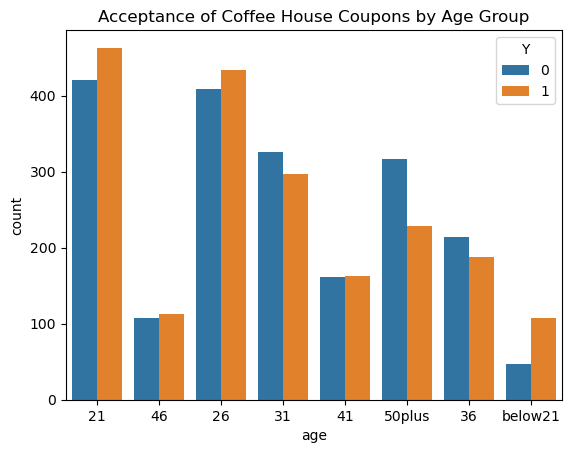

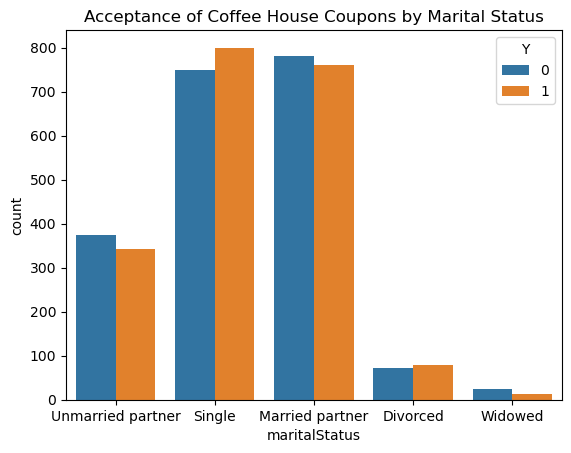

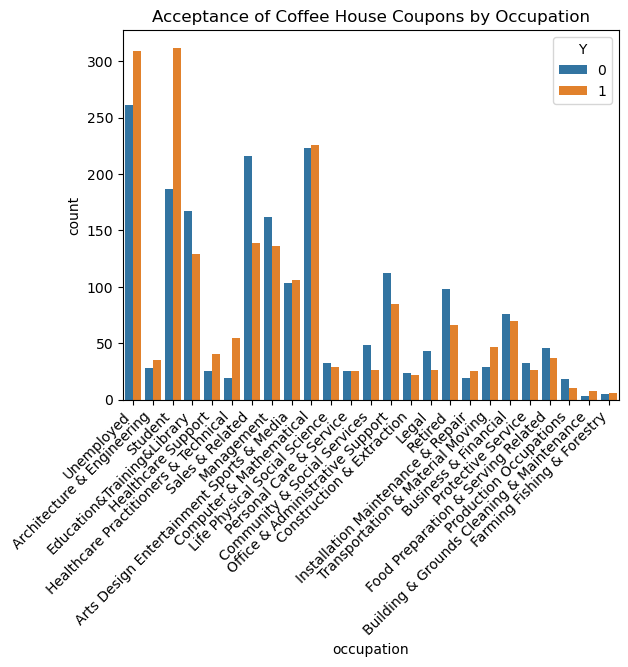

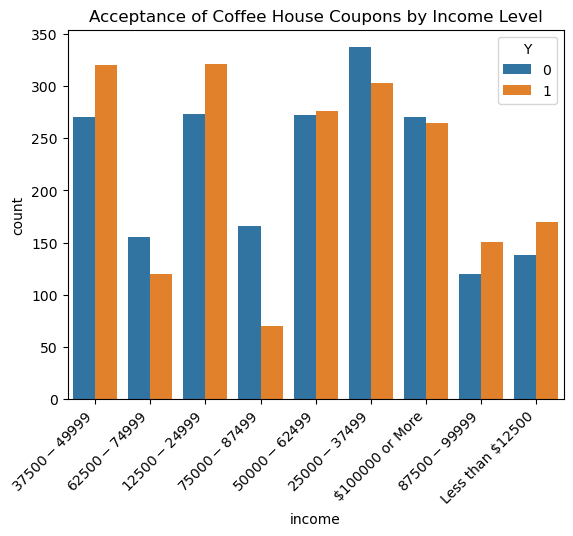

In [20]:
# Create a new DataFrame for Coffee House coupons
coffee_coupons_df = data[data['coupon'].isin(['Coffee House'])]

# Check the proportion of accepted coupons
proportion_coffee_accepted = coffee_coupons_df['Y'].mean()
print(f"Proportion of Coffee House coupons accepted: {proportion_coffee_accepted:.2%}")

# Explore the data to identify potential characteristics
coffee_coupons_df.info()

# Investigate missing values
coffee_coupons_df.isnull().sum()

# Explore unique values in relevant columns
print(coffee_coupons_df['passanger'].unique())
print(coffee_coupons_df['gender'].unique())
print(coffee_coupons_df['age'].unique())
print(coffee_coupons_df['maritalStatus'].unique())
print(coffee_coupons_df['occupation'].unique())
print(coffee_coupons_df['income'].unique())

# Visualize the distribution of relevant columns
sns.countplot(data=coffee_coupons_df, x='passanger', hue='Y')
plt.title('Acceptance of Coffee House Coupons by Passenger Type')
plt.show()

sns.countplot(data=coffee_coupons_df, x='gender', hue='Y')
plt.title('Acceptance of Coffee House Coupons by Gender')
plt.show()

sns.countplot(data=coffee_coupons_df, x='age', hue='Y')
plt.title('Acceptance of Coffee House Coupons by Age Group')
plt.show()

sns.countplot(data=coffee_coupons_df, x='maritalStatus', hue='Y')
plt.title('Acceptance of Coffee House Coupons by Marital Status')
plt.show()

sns.countplot(data=coffee_coupons_df, x='occupation', hue='Y')
plt.title('Acceptance of Coffee House Coupons by Occupation')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

sns.countplot(data=coffee_coupons_df, x='income', hue='Y')
plt.title('Acceptance of Coffee House Coupons by Income Level')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

In [21]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Since car column has no importance in terms of whether the coupon will be accepted or not it doesn't matter if it has null values 
values. However if we dropped the car column it will erase a lot of data so the best thing to do with the car column is
leave it. This follow non null values for the car column, (Scooter and motorcycle', 'crossover', 'Mazda5', 'do not drive',
'Car that is too old to install Onstar :D') does not have any importance with accepting the coupons and since there are 
overwelming more null value than all non null values combined for the car column it is best to leave as it is.             